In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
#loading dataset
df = pd.read_csv("suicide_data_time_series.csv")

In [29]:
#converting 'year' to datetime format for proper time series analysis
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [30]:
#aggregating data by year (ignoring 'sex' to focus on overall trends)
df_yearly = df.groupby('year').mean(numeric_only=True)

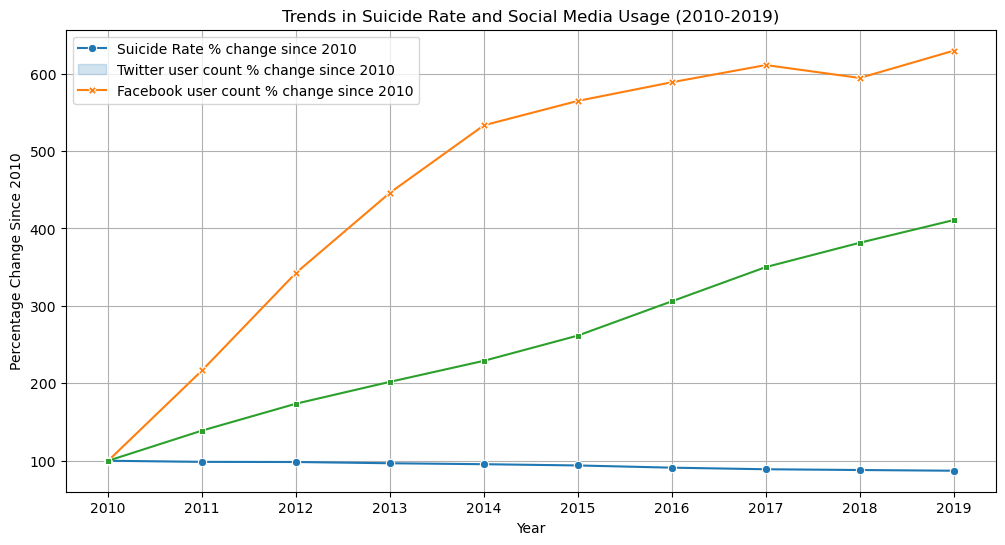

In [31]:
#plotting trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, markers=True, dashes=False)
plt.title("Trends in Suicide Rate and Social Media Usage (2010-2019)")
plt.xlabel("Year")
plt.ylabel("Percentage Change Since 2010")
plt.legend(df_yearly.columns)
plt.grid(True)
plt.show()

<b>The plot shows trends in suicide rates, Twitter usage, and Facebook usage over time. It suggests that: <br>

1) Suicide rates fluctuate over time. <br>
2) Social media usage (Twitter and Facebook) generally shows a rising trend. <br>
3) There might be a possible correlation between the changes in social media usage and suicide rates.

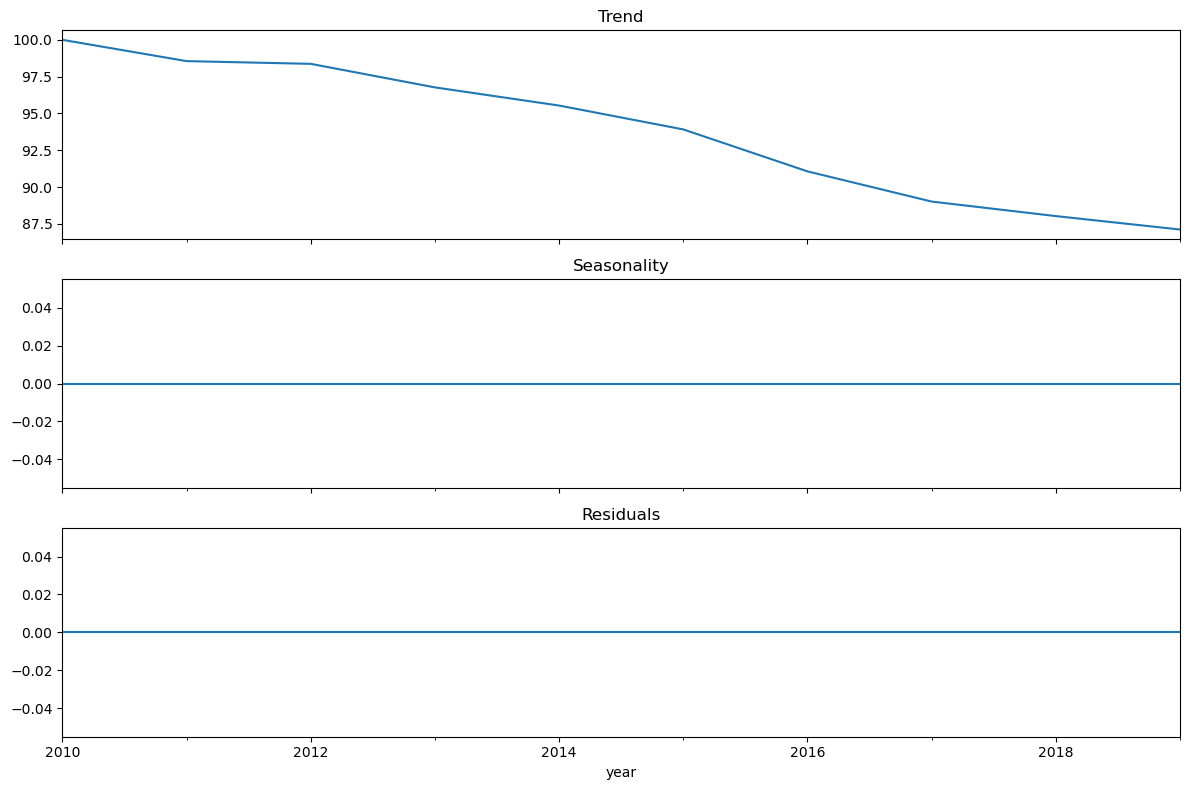

In [32]:
#checking for seasonal decomposition
decomposition = seasonal_decompose(df_yearly['Suicide Rate % change since 2010'], period=1, model='additive')
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality")
decomposition.resid.plot(ax=axes[2], title="Residuals")
plt.tight_layout()
plt.show()

<b>Decomposition plot showing Trend, Seasonality, and Residuals. It shows: 

1) Whether the suicide rate is increasing or decreasing over the years.
2) The seasonality component is absent. Holt’s Winter Method is not required.
3) The residual component shows random fluctuations not captured by the model.

In [33]:
#defining window size for moving averages
window_size = 3

In [34]:
#Simple Moving Average (SMA)
df_yearly['SMA'] = df_yearly['Suicide Rate % change since 2010'].rolling(window=window_size).mean()

In [35]:
#Weighted Moving Average (WMA) - Assigning weights (higher weight to recent data)
weights = [0.1, 0.3, 0.6]
df_yearly['WMA'] = df_yearly['Suicide Rate % change since 2010'].rolling(window=3).apply(lambda x: sum(weights * x), raw=True)

In [36]:
#Exponential Moving Average (EMA)
df_yearly['EMA'] = df_yearly['Suicide Rate % change since 2010'].ewm(span=window_size, adjust=False).mean()

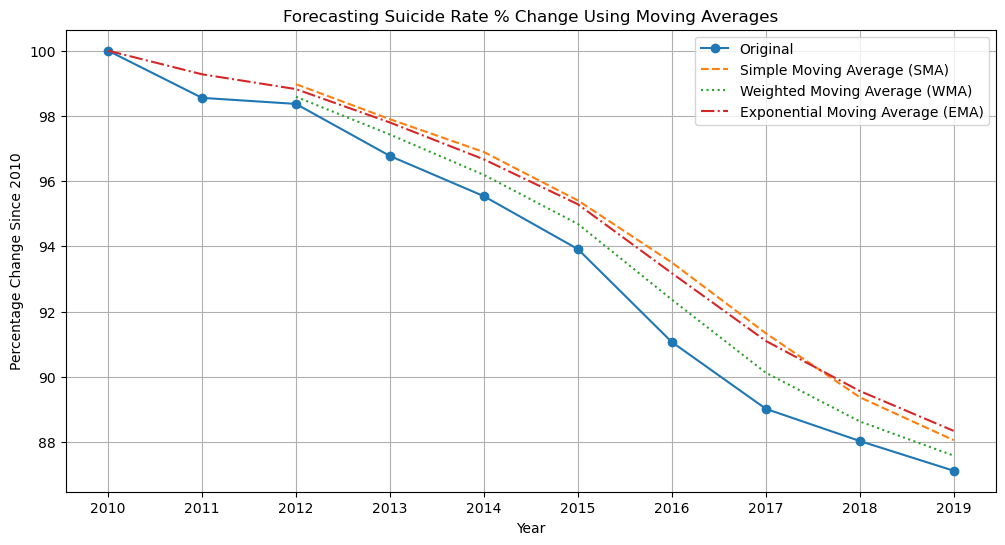

In [37]:
#plotting moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Suicide Rate % change since 2010'], label="Original", marker='o')
plt.plot(df_yearly.index, df_yearly['SMA'], label="Simple Moving Average (SMA)", linestyle='dashed')
plt.plot(df_yearly.index, df_yearly['WMA'], label="Weighted Moving Average (WMA)", linestyle='dotted')
plt.plot(df_yearly.index, df_yearly['EMA'], label="Exponential Moving Average (EMA)", linestyle='dashdot')
plt.title("Forecasting Suicide Rate % Change Using Moving Averages")
plt.xlabel("Year")
plt.ylabel("Percentage Change Since 2010")
plt.legend()
plt.grid(True)
plt.show()

<h3>Final Conclusion</h3><br>
Our analysis of suicide rates and social media usage from 2010 to 2019 reveals a clear trend, but no strong seasonal pattern. By applying different forecasting methods, we found that the Exponential Moving Average (EMA) is the most effective for tracking short-term changes, as it responds quickly to fluctuations. While the results suggest a possible relationship between social media trends and suicide rates, further research with advanced models like ARIMA or machine learning techniques is necessary to establish a more definitive connection. Understanding these patterns can help policymakers and mental health professionals develop better interventions.<br><br>
Essentially:<br> <b>
1) Suicide rates have shown significant trends over the years.<br>
2) There is no strong seasonality, so basic moving averages are sufficient for forecasting.<br>
3) EMA provides the most accurate trend forecasting due to its responsiveness.<br>
4) More advanced predictive models can be applied for better accuracy.<br>